# Visualiser les champs électriques en Python

Le but ici est de commencer simplement et éventuellement d'avoir du code Python flexible que nous allons réutiliser. Nous allons faire plusieurs itérations pour visualiser le champ électrique avec la fonction `plt.quiver` de `matplotlib`.

## Pour commencer
Choisissez dans le menu de Google Colab Runtime>Run All.


## Itération 01-simplest_vector_on_graph.py
La fonction `quiver` (i.e. en anglais *quiver* = carquois pour tenir des flèches)
est très simple: on passe les coordonnées x,y et les longueurs u,v des vecteurs que
l'on veut tracer. Chaque valeur est dans une list séparée. Ici, on aura donc deux
vecteurs:

Au point (0,0), un vecteur avec les composantes (2,1) dans les unités du système de
coordonnées.
Au point (-2,1), un vecteur avec les composantes (3,-2) dans les unités du système de
coordonnées.


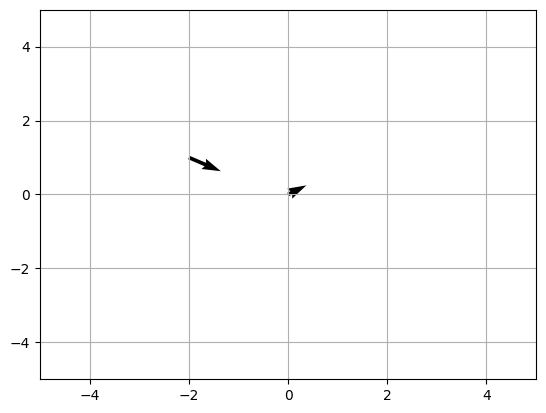

In [1]:
import matplotlib.pyplot as plt

X = [0,-2]
Y = [0, 1]

U = [4, 7]
V = [2,-3]

plt.quiver(X, Y, U, V)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.grid()
plt.show()

## Itération 02-simplest_vector_field.py
La fonction quiver (i.e. en anglais quiver = carquois pour tenir des flèches)
est très simple: on passe les coordonnées x,y et les longueurs u,v des vecteurs que
l'on veut tracer. Chaque valeur est dans une list séparée.

Ici, 9 vecteurs aux positions (-1,-1), ensuite (0,-1), (1,-1), ... (0,1) et (1,1)
avec des longueurs de 2, 3 et 4 sont ajoutés dans le graphique.


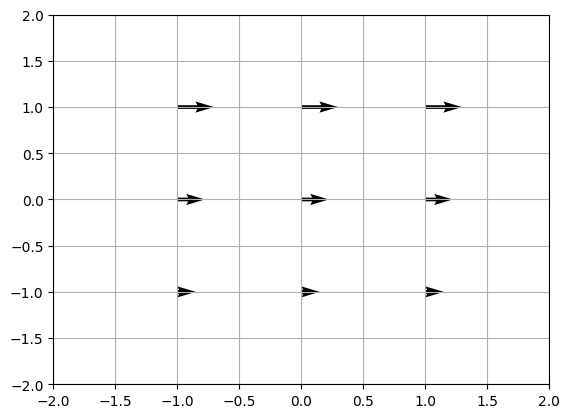

In [2]:
import matplotlib.pyplot as plt

X = [-1, 0, 1,-1, 0, 1,-1, 0, 1]
Y = [-1,-1,-1, 0, 0, 0, 1, 1, 1]

U = [ 2, 2, 2, 3, 3, 3, 4, 4, 4]
V = [ 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.quiver(X, Y, U, V)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.grid()
plt.show()


## Itération 03-slightly_better_vector_field.py
Pour facilement construire une liste de coordonnées sur un grille, on peut
utiliser les fonctions `linspace` et `meshgrid` de numpy: on lui donne nos
valeurs en X (seulement) et en Y (seulement) et ensuite la fonction mesh les
combinera pour compléter la grille.

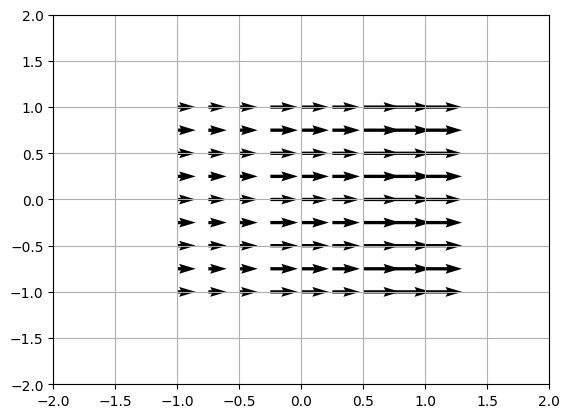

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,9) # 9 valeurs différentes entre -1 et 1
y = np.linspace(-1,1,9) # 9 valeurs différentes entre -1 et 1
X,Y = np.meshgrid(x,y)  # Les 81 combinaisons possibles pour former la grille


U = [ 2, 2, 2, 3, 3, 3, 4, 4, 4] * 9 # Je sauve du temps et je repete 9 fois la meme liste
V = [ 0 ] * 81

plt.quiver(X, Y, U, V)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.grid()
plt.show()


##Itération 04-decent_vector_field.py
Encore mieux, on peut utiliser X et Y (qui sont des arrays `numpy`) comme des variables.
Ainsi, en ecrivant `sin(X)` on aura le résultat de la fonction pour chaque valeur de la liste.
Les listes U et V auront automatiquement la même longueurs que X et Y, et les éléments
pour chaque indice seront des éléments correspondants.


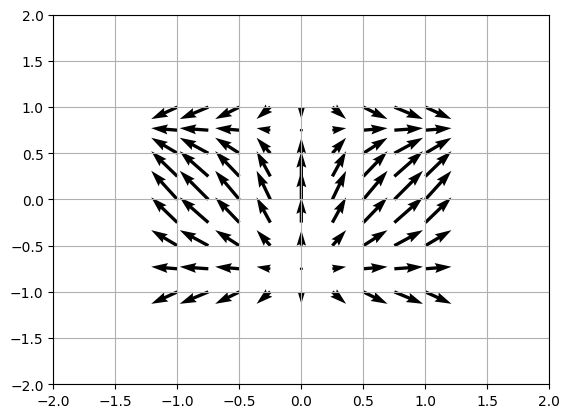

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,9) # 9 valeurs différentes entre -1 et 1
y = np.linspace(-1,1,9) # 9 valeurs différentes entre -1 et 1
X,Y = np.meshgrid(x,y)  # Les 81 combinaisons possibles pour former la grille


U = np.sin(2*X)
V = np.cos(2*Y)

plt.quiver(X, Y, U, V) # On peut ajuster les échelles (scale et units) : voir 10-testing_vector_fields.py
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.grid()
plt.show()


## Itération 05-better_vector_field.py
On nettoie le code un peu et on met des couleurs representant la force du champ.

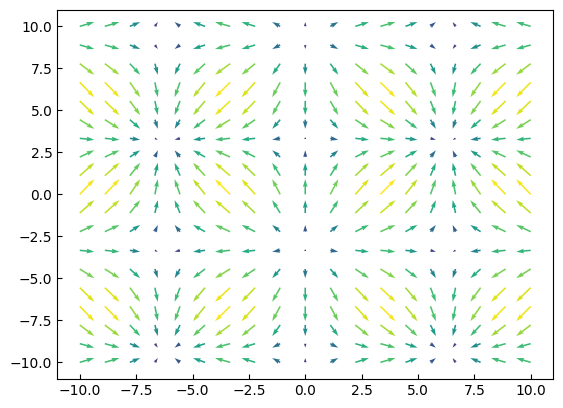

In [5]:
import matplotlib.pyplot as plt
import numpy as np

N = 19

x = np.linspace(-10,10,N) # N valeurs différentes entre -1 et 1
y = np.linspace(-10,10,N) # N valeurs différentes entre -1 et 1
X,Y = np.meshgrid(x,y)  # Les 81 combinaisons possibles pour former la grille

U = np.sin(X/2) # La composante en x des vecteurs
V = np.cos(Y/2) # La composante en y des vecteurs

lengths = np.sqrt(U*U+V*V) # Le 5e argument donne la couleur selon la colormap

plt.tick_params(direction="in")

plt.quiver(X, Y, U, V, lengths) # On peut changer la couleur avec la longueur
#plt.quiver(X, Y, U, V, lengths, cmap=cm.inferno) # Si vous êtes un artiste
#plt.quiver(X, Y, U, V, lengths, cmap=cm.jet) # Si vous voulez choquer Louis

plt.show()


## Itération 06-field_class.py

Nous avons le code suivant pour faire un graphique d'un champ vectoriel avec des paramètres raisonnables:

```
N = 19

x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
X,Y = np.meshgrid(x,y)

U = np.sin(X/2)
V = np.cos(Y/2)

lengths = np.sqrt(U*U+V*V)
plt.tick_params(direction="in")
plt.quiver(X, Y, U, V, lengths)
plt.show()
```

Il suffirait de le recopier a chaque fois que l'on veut l'utiliser.  On
pourrait aussi le mettre dans une fonction, qu'on mettrait dans un fichier,
et qui definirait une fonction qu'on pourrait utiliser a l'appelant avec les
paramètres.  Ce serait une fonction affreuse:
```
def plot_vector_field(x_min, x_max, y_min, y_max, N, X,Y,U,V, colors):
	# blabla
```

et meme si je l'utilisais, je manque de flexibilité et je dois quand même
générer mon champ avant (`U` et `V`). Il y a une bien meilleure facon, c'est en
faisant des classes pour gérer de façon efficace la complexité du problème:
clairement, nous voulons créer et manipuler un champ vectoriel, c'est clairement
le concept le plus important et central de notre probleme.

Nous allons donc créer une classe (`VectorField`) qui contiendra toutes les données
pour décrire le champs, mais aussi des méthodes pour nous aider à visualiser, manipuler
le champ. Ainsi, nous pourrions utiliser notre code simplement comme suit:

```
from vectorfield import VectorField

e_field = VectorField(X, Y, U, V)
e_field.display()

```

Pour commencer, je fais le strict minimum pour reproduire ce que nous avions auparavant:

1. Afficher de -10 a 10
2. Mettre 19 points par défaut
3. Mettre un champ par défaut si aucun n'est fourni



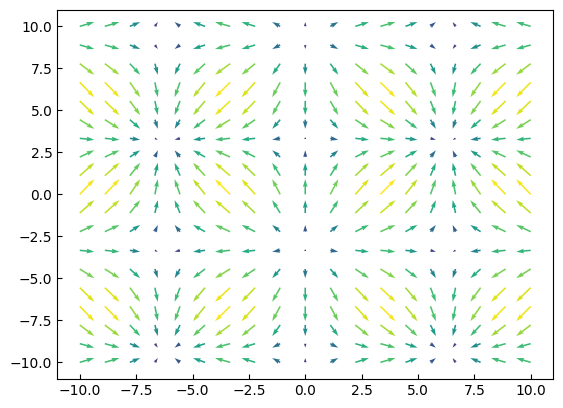

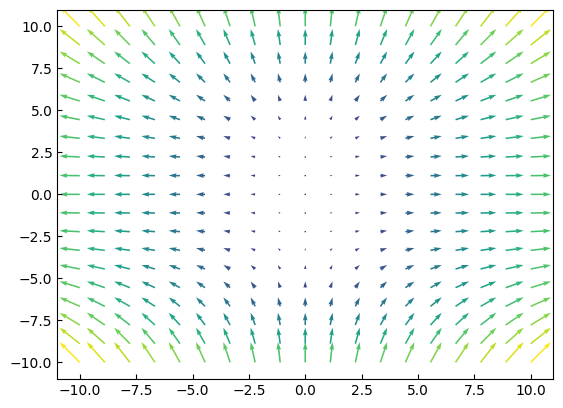

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class VectorField2D:
	def __init__(self, X=None, Y=None, U=None, V=None):
		if X is None or Y is None:
			x = np.linspace(-10,10,19)
			y = np.linspace(-10,10,19)
			X,Y = np.meshgrid(x,y)

		self.X = X
		self.Y = Y

		if U is None or V is None:
			U = np.sin(self.X/2)
			V = np.cos(self.Y/2)

		self.U = U
		self.V = V

	def display(self):
		plt.tick_params(direction="in")

		lengths = np.sqrt(self.U*self.U+self.V*self.V)
		plt.quiver(self.X, self.Y, self.U, self.V, lengths)
		plt.show()


field = VectorField2D()
field.display() # Le défaut est un champ constant

# Je peux changer le champ en assignant directement les variables U et V. C'est moche, mais ca fonctionne:
field.U = field.X/10
field.V = field.Y*field.Y/100
field.display()


Conclusion: j'ai un peu avancé, car je peux maintenant utiliser une classe qui englobe tous les détails de mon champ
et me donne une méthode `display()` pour l'afficher.  Je peux mettre des paramètres par défaut et changer les variables
a la main par la suite, même changer le champ.

C'est un peu mieux, mais il y a encore plusieurs amélioration possibles:

1. Il faudrait trouver une facon de rapidement choisir des exemples de champs (charge simple, dipole, sphère, etc...)
2. Il faudrait raffiner le contrôle du champ
3. Il faudrait permettre l'ajustement des détails de l'affichage
4. Il faudrait valider les données pour éviter des variables `X`,`Y` et `U`,`V` incompatibles
5. Et encore plus...


## Itération 07-better_field_class.py
Nous voulons continuer d'améliorer la classe pour faciliter son usage et surtout la rendre plus flexible.
Nous allons créer des méthodes qui vont nous permettre d'éviter de modifier les variables directement
et nous allons tenter d'ajouter une façon de mieux utiliser le graphique.

Pour ce faire, nous allons ajouter des méthodes qui modifient les variables, et qui nous aident à créer
des champs ou des coordonnées.

Nous gardons aussi la figure qui est créée par `plt.quiver()` et nous pourrons la modifier si nécessaire.
Dans matplotlib, une figure s'appelle des `axes`.  Je n'ai pas inventé le nom.

Nous pouvons utiliser le code de facon un peu plus simple:

```
	field = VectorField2D(size=20)
	field.display() # Le défaut est un champ en sinus et cosinus

	X,Y = field.xy_mesh()
	field.assign_field_components(U = X/10, V = Y*Y/100)
	field.display()

```



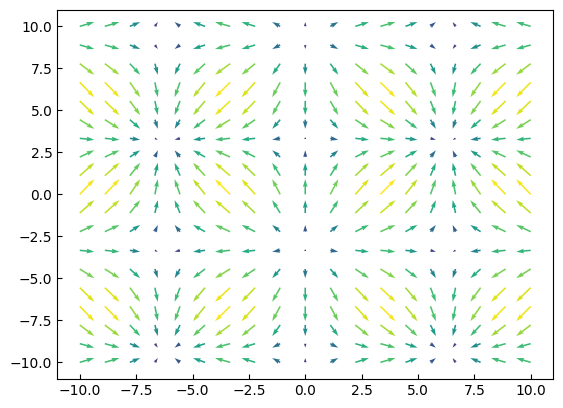

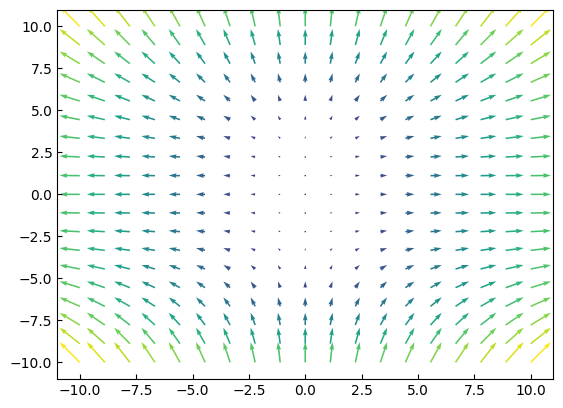

In [7]:
import matplotlib.pyplot as plt
import numpy as np

class VectorField2D:
	def __init__(self, size=None, X=None, Y=None, U=None, V=None):
		if size is not None:
			X, Y = self.create_square_meshgrid(size)
		elif X is None or Y is None:
			X, Y = self.create_square_meshgrid()

		if len(X) != len(Y):
			raise ValueError("Les composantes X et Y doivent avoir le meme nombre d'éléments")

		self.X = X
		self.Y = Y

		if U is None or V is None:
			U, V = self.create_demo_field_components()

		self.U = U
		self.V = V

		self.quiver_axes = None

		self.validate_arrays() # Avant d'aller plus loin, nous voulons un champ valide

	def create_square_meshgrid(self, size=20, N=19):
		x = np.linspace(-size/2,size/2, N)
		y = np.linspace(-size/2,size/2, N)
		return np.meshgrid(x,y)

	def create_demo_field_components(self):
		U = np.sin(self.X/2)
		V = np.cos(self.Y/2)
		return U, V

	def validate_arrays(self):
		if self.X is None or self.Y is None:
			raise ValueError("Les coordonnées X et Y ne sont pas assignées")

		if self.U is None or self.V is None:
			raise ValueError("Les composantes U et V du champ vectoriel ne sont pas assignées en tout point X et Y")

		if len(self.U) != len(self.V):
			raise ValueError("Les composantes U et V doivent avoir le meme nombre d'éléments")

		if len(self.U) != len(self.X):
			raise ValueError("Les composantes U,V doivent avoir le meme nombre d'éléments que X et Y")

	def xy_mesh(self):

		return self.X, self.Y

	def assign_field_components(self, U, V):
		self.U = U
		self.V = V
		self.validate_arrays()

		self.quiver_axes = None # Nous avons changé le champ, la figure n'est plus valide

	def display(self):
		self.validate_arrays()

		if self.quiver_axes is None:
			self.quiver_axes = plt.subplot(1,1,1)
			self.quiver_axes.tick_params(direction="in")

			lengths = np.sqrt(self.U*self.U+self.V*self.V)
			self.quiver_axes = plt.quiver(self.X, self.Y, self.U, self.V, lengths)
			plt.show()

if __name__ == "__main__": # C'est la facile rigoureuse d'ajouter du code après une classe
	field = VectorField2D(size=20)
	field.display() # Le défaut est un champ en sinus et cosinus

	X,Y = field.xy_mesh()
	field.assign_field_components(U = X/10, V = Y*Y/100)
	field.display()




## Itération 08-even_better_field_class.py
Vous pouvez arreter a tout moment de lire les améliorations pour la classe si vous les trouvez trop
difficile à comprendre.

J'aimerais pouvoir rapidement changer le champ de facon efficace:
```
field = VectorField()
field.create_single_charge_field_components()
```

On remarquera aussi que le champ d'une charge varie rapidement, donc l'utilisation de la longueur de la fleche
pour représenter le champ devient problématique car c'est parfois trop long, ou c'est essentiellement nul
et on ne voit rien. J'ajoute une option pour voir le logarithme de la longueur.


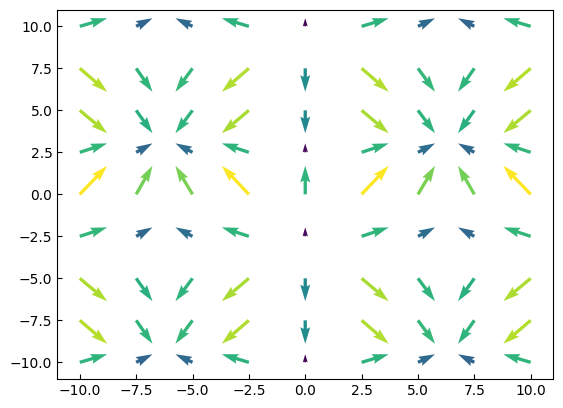

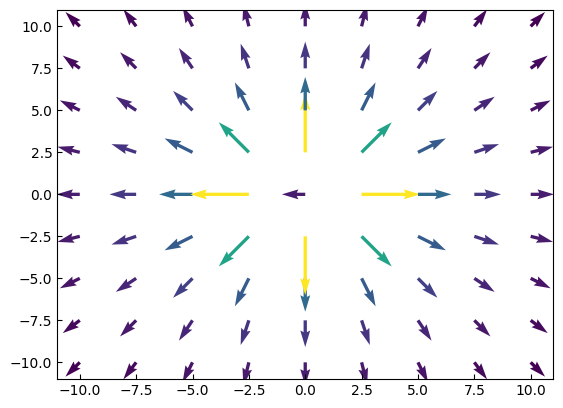

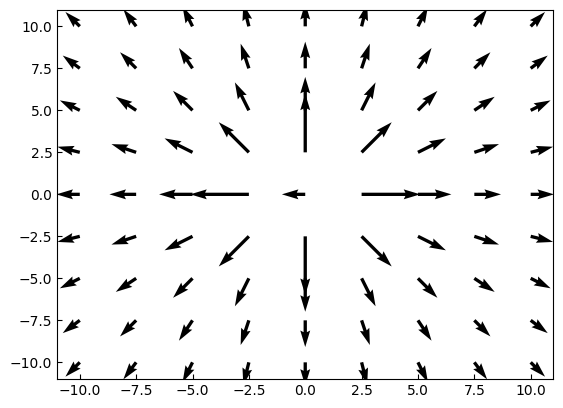

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class VectorField2D:
	def __init__(self, size=None, N=19, X=None, Y=None, U=None, V=None):
		if size is not None:
			X, Y = self.create_square_meshgrid(size, N)
		elif X is None or Y is None:
			X, Y = self.create_square_meshgrid()

		if len(X) != len(Y):
			raise ValueError("Les composantes X et Y doivent avoir le meme nombre d'éléments")

		self.X = X
		self.Y = Y

		if U is None or V is None:
			U, V = self.create_demo_field_components()

		self.U = U
		self.V = V

		self.quiver_axes = None

		self.validate_arrays() # Avant d'aller plus loin, nous voulons un champ valide

	@property
	def xy_mesh(self):
		return self.X, self.Y

	@property
	def rphi_mesh(self):
		X,Y = self.xy_mesh
		return np.sqrt(X*X+Y*Y), np.arctan2(Y, X)

	@property
	def field_magnitude(self):
		return np.sqrt(self.U*self.U+self.V*self.V)

	@property
	def field_log_magnitude(self):
		return np.log(self.field_magnitude)

	def create_square_meshgrid(self, size=20, N=19):
		x = np.linspace(-size/2,size/2, N)
		y = np.linspace(-size/2,size/2, N)
		return np.meshgrid(x,y)

	def create_null_field_components(self):
		X,Y = self.xy_mesh
		return X*0, X*0 # C'est un truc pour avoir rapidement une liste de la meme longueur avec des zeros

	def create_demo_field_components(self):
		X,Y = self.xy_mesh
		return np.sin(X/2), np.cos(Y/2)

	def create_single_charge_field_components(self):

		# On pourra se retrouver, parfois, avec R==0 (a l'origin), et donc 1/
		# (R*R) sera infini. On veut éviter les infinités et les
		# discontinuités.  Pour l'instant, pour simplifer, je vais simplement
		# ajouter un tout petit 0.01 a R*R pour eviter que cela donne une
		# division par zero. C'est affreux, mais ca évite les
		# problèmes.
		R, PHI = self.rphi_mesh

		return np.cos(PHI)/np.log(R*R+0.01), np.sin(PHI)/np.log(R*R+0.01)

	def validate_arrays(self):
		if self.X is None or self.Y is None:
			raise ValueError("Les coordonnées X et Y ne sont pas assignées")

		if self.U is None or self.V is None:
			raise ValueError("Les composantes U et V du champ vectoriel ne sont pas assignées en tout point X et Y")

		if len(self.U) != len(self.V):
			raise ValueError("Les composantes U et V doivent avoir le meme nombre d'éléments")

		if len(self.U) != len(self.X):
			raise ValueError("Les composantes U,V doivent avoir le meme nombre d'éléments que X et Y")

	def assign_field_components(self, U, V):
		self.U = U
		self.V = V
		self.validate_arrays()

		self.quiver_axes = None # Nous avons changé le champ, la figure n'est plus valide

	def display(self, is_color=True):
		self.validate_arrays()


		if self.quiver_axes is None:
			self.quiver_axes = plt.subplot(1,1,1)
			self.quiver_axes.tick_params(direction="in")

		self.quiver_axes.cla()

		if is_color:
			lengths = self.field_magnitude
			lengths /= np.max(lengths)
			self.quiver_axes.quiver(self.X, self.Y, self.U, self.V, lengths)
		else:
			self.quiver_axes.quiver(self.X, self.Y, self.U, self.V)

		plt.show()
		self.quiver_axes = None




if __name__ == "__main__": # C'est la façon rigoureuse d'ajouter du code après une classe
	field = VectorField2D(size=20, N=9)
	field.display() # Le défaut est un champ en sinus et cosinus

	U, V = field.create_single_charge_field_components()
	field.assign_field_components(U, V)
	field.display(is_color=True)
	field.display(is_color=False)



## Itération 09-much_better_field_class
La classe est bien, mais on dirait qu'il y a beaucoup de gestion des
coordonnées `X`,`Y` et `R`, `PHI`. Puisqu'il y a beaucoup de gestion des coordonnées
et du meshgrid, il est tentant de faire une classe pour gérer cette partie
(très simple) et de mettre toute la validation pour éviter d'ajouter des
détails dans notre classe de `VectorField2D`: au final, la classe `VectorField2D`
n'a pas besoin de savoir les détails des coordonnées: on veut simplement les
avoir pour faire les calculs, mais on ne veut pas les gérer.

On fera donc une toute petite classe pour isoler les détails des coordonnées.
Pour des raisons qui deviendront claires plus tard, nous allons l'appeler
`SurfaceDomain` (car pour l'instant on fait tout en 2D). Le plan est de
simplement transférer les détails dans cette classe.


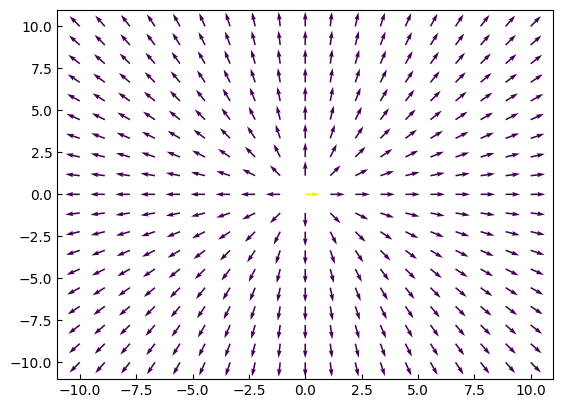

In [9]:
import matplotlib.pyplot as plt
import numpy as np

class SurfaceDomain:
	def __init__(self, size=20, N=19, X=None, Y=None):
		if size is not None:
			X, Y = self.create_square_meshgrid(size, N)
		elif X is None or Y is None:
			X, Y = self.create_square_meshgrid()

		if len(X) != len(Y):
			raise ValueError("Les composantes X et Y doivent avoir le meme nombre d'éléments")

		self._X = X # Lorsqu'on utilise _ devant une variable, c'est une convention de ne pas l'appeler directement
		self._Y = Y # et d'utiliser les @property accessors

	def xy_mesh(self):
		return self._X, self._Y

	def rphi_mesh(self):
		X,Y = self.xy_mesh()
		return np.sqrt(X*X+Y*Y), np.arctan2(Y, X)

	def create_square_meshgrid(self, size=20, N=19):
		x = np.linspace(-size/2,size/2, N)
		y = np.linspace(-size/2,size/2, N)
		return np.meshgrid(x,y)

class VectorField2D:
	def __init__(self, surface=None, U=None, V=None):
		if surface is None:
			surface = SurfaceDomain()

		self.domain = surface

		if U is None or V is None:
			U, V = self.create_null_field_components()

		self.U = U
		self.V = V

		self.quiver_axes = None

		self.validate_arrays() # Avant d'aller plus loin, nous voulons un champ valide


	@property
	def field_magnitude(self):
		return np.sqrt(self.U*self.U+self.V*self.V)

	def create_null_field_components(self):
		X,Y = self.domain.xy_mesh()
		return X*0, X*0 # C'est un truc pour avoir rapidement une liste de la meme longueur avec des zeros

	def create_demo_field_components(self):
		X,Y = self.domain.xy_mesh()
		return np.sin(X/2), np.cos(Y/2)

	def create_single_charge_field_components(self):

		# On pourra se retrouver, parfois, avec R==0 (a l'origin), et donc 1/(R*R)
		# sera infini. On veut éviter les infinités et les discontinuités.
		# Pour l'instant, pour simplifer, je vais simplement ajouter un tout
		# petit 0.01 a R*R pour eviter que cela donne une division par zero.
		# C'est affreux, mais ca évite les problèmes.
		R, PHI = self.domain.rphi_mesh()

		return np.cos(PHI)/(R*R+0.01), np.sin(PHI)/(R*R+0.01)

	def validate_arrays(self):
		if self.U is None or self.V is None:
			raise ValueError("Les composantes U et V du champ vectoriel ne sont pas assignées en tout point X et Y")

		if len(self.U) != len(self.V):
			raise ValueError("Les composantes U et V doivent avoir le meme nombre d'éléments")

	def add_field_components(self, U, V):
		self.U += U
		self.V += V
		self.validate_arrays()

		self.quiver_axes = None # Nous avons changé le champ, la figure n'est plus valide

	def display(self, use_color=True):
		self.validate_arrays()

		if self.quiver_axes is None:
			self.quiver_axes = plt.subplot(1,1,1)
			self.quiver_axes.tick_params(direction="in")

		self.quiver_axes.cla()

		X,Y = self.domain.xy_mesh()

		if use_color:
			lengths = self.field_magnitude
			self.quiver_axes.quiver(X, Y, self.U/lengths, self.V/lengths, lengths)
		else:
			self.quiver_axes.quiver(X, Y, self.U, self.V)

		plt.show()
		self.quiver_axes = None

if __name__ == "__main__": # C'est la façon rigoureuse d'ajouter du code après une classe
	field = VectorField2D() # Le domaine par défaut est -10 a 10 avec 19 points par dimension

	U, V = field.create_single_charge_field_components()
	field.add_field_components(U, V)
	U, V = field.create_single_charge_field_components()
	field.add_field_components(U, V)
	field.display(use_color=True)



## Itération 10-very_much_better_field_class.py
La classe précédente réussit à refaire ce que nous faisions avant, mais
isole un peu les détails des coordonnées (i.e. le domain 2D) avec lesquelles
nous faisons les calculs.

L'idée derrière cette stratégie permet, par exemple, de simplement demander
les `xy_mesh` à la classe.  C'est plus clair: je demande a la classe "Domain" de me donner les valeurs du domaine sur lequel je dois calculer mon champ. Mais cela donne de la flexibilité: nous pouvons par exemple demander les valeurs
par rapport à une autre origine pour une charge placée à `(xo, yo)` i.e.
ailleurs qu'à l'origine.

Maintenant, il devient plus simple de transformer un peu le fonctionnement de notre code: la
classe `VectorField2D` est responsable de calculer des champs: elle "connnait
l'electromagnetisme", nous allons donc lui demander le champ d'une charge placée
a `(xo, yo)` et l'ajouter au champ total.

1. Donc on commence avec un champ nul
2. La fonction `assign_field_components` a été renommée `add_field_components` et additionne les champs au lieu de le remplacer
3. On ajoute des charges à une position `(xo, yo)` avec une charge q (qui peut être négative)
4. On en ajoute tant qu'on veut et on visualise


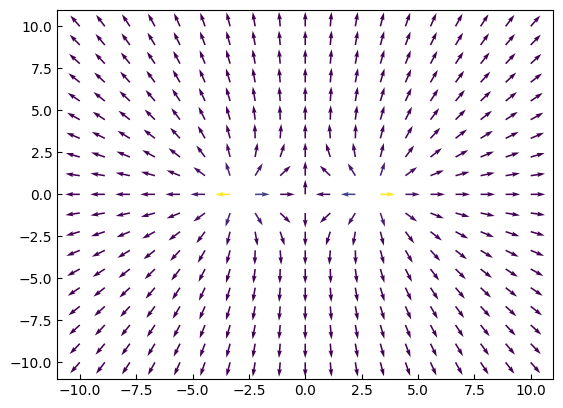

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class SurfaceDomain:
	def __init__(self, size=20, N=19, X=None, Y=None):
		if size is not None:
			X, Y = self.create_square_meshgrid(size, N)
		elif X is None or Y is None:
			X, Y = self.create_square_meshgrid()

		if len(X) != len(Y):
			raise ValueError("Les composantes X et Y doivent avoir le meme nombre d'éléments")

		self._X = X # Lorsqu'on utilise _ devant une variable, c'est une convention de ne pas l'appeler directement
		self._Y = Y # et d'utiliser les @property accessors

	def xy_mesh(self, xo=0, yo=0):
		return self._X-xo, self._Y-yo

	def rphi_mesh(self, xo=0, yo=0):
		X,Y = self.xy_mesh(xo, yo)
		return np.sqrt(X*X+Y*Y), np.arctan2(Y, X)

	def create_square_meshgrid(self, size=20, N=19):
		x = np.linspace(-size/2,size/2, N)
		y = np.linspace(-size/2,size/2, N)
		return np.meshgrid(x,y)

class VectorField2D:
	def __init__(self, surface=None, U=None, V=None):
		if surface is None:
			surface = SurfaceDomain()

		self.domain = surface

		if U is None or V is None:
			U, V = self.create_null_field_components()

		self.U = U
		self.V = V

		self.quiver_axes = None

		self.validate_arrays() # Avant d'aller plus loin, nous voulons un champ valide


	@property
	def field_magnitude(self):
		return np.sqrt(self.U*self.U+self.V*self.V)

	def create_null_field_components(self):
		X,Y = self.domain.xy_mesh()
		return X*0, X*0 # C'est un truc pour avoir rapidement une liste de la meme longueur avec des zeros

	def create_demo_field_components(self):
		X,Y = self.domain.xy_mesh()
		return np.sin(X/2), np.cos(Y/2)

	def create_single_charge_field_components(self, xo=0, yo=0, q=1):

		# On pourra se retrouver, parfois, avec R==0 (a l'origin), et donc 1/(R*R)
		# sera infini. On veut éviter les infinités et les discontinuités.
		# Pour l'instant, pour simplifer, je vais simplement ajouter un tout
		# petit 0.01 a R*R pour eviter que cela donne une division par zero.
		# C'est affreux, mais ca évite les problèmes.
		R, PHI = self.domain.rphi_mesh(xo, yo)

		return q*np.cos(PHI)/(R*R+0.01), q*np.sin(PHI)/(R*R+0.01)

	def validate_arrays(self):
		if self.U is None or self.V is None:
			raise ValueError("Les composantes U et V du champ vectoriel ne sont pas assignées en tout point X et Y")

		if len(self.U) != len(self.V):
			raise ValueError("Les composantes U et V doivent avoir le meme nombre d'éléments")

	def add_field_components(self, U, V):
		self.U += U
		self.V += V
		self.validate_arrays()

		self.quiver_axes = None # Nous avons changé le champ, la figure n'est plus valide

	def display(self, use_color=True):
		self.validate_arrays()

		if self.quiver_axes is None:
			self.quiver_axes = plt.subplot(1,1,1)
			self.quiver_axes.tick_params(direction="in")

		self.quiver_axes.cla()

		X,Y = self.domain.xy_mesh()

		if use_color:
			lengths = self.field_magnitude
			self.quiver_axes.quiver(X, Y, self.U/lengths, self.V/lengths, lengths)
		else:
			self.quiver_axes.quiver(X, Y, self.U, self.V)

		plt.show()
		self.quiver_axes = None

if __name__ == "__main__": # C'est la façon rigoureuse d'ajouter du code après une classe
	domain=SurfaceDomain(size=20, N=19)
	field = VectorField2D(surface=domain) # Le domaine par défaut est -10 a 10 avec 19 points par dimension

	U, V = field.create_single_charge_field_components(xo=3, yo=0, q=1)
	field.add_field_components(U, V)
	U, V = field.create_single_charge_field_components(xo=-3, yo=0, q=1)
	field.add_field_components(U, V)
	field.display(use_color=True)



## Itération 11-wow_field_class
Je trouve que les couleurs ne sont pas terribles: puisqu'il y a souvent des
valeurs très grandes (i.e. infinies) à l'origine des charges, toutes les
petites valeurs se retrouvent de la même couleur.  Je vais plutot limiter les
valeurs entre le 10e et 90e percentile au lieu de normaliser sur la valeur
maximale. De plus, je trouve que c'est mieux si on utilise les couleurs foncées pour les grandes valeurs et pâles pour les plus petites, j'ai donc changé la colormap pour `viridis_r`, qui est la colormap par défaut de Python mais inversée.

De plus, on voit qu'on a souvent les mêmes séquences comme suit:

    U, V = field.create_single_charge_field_components(xo=3, yo=0, q=1)
    field.add_field_components(U, V)

donc je crois qu'il est plus simple de créer une nouvelle fonction qui fera tout d'un seul appel de fonction:

    field.add_single_charge(xo=3, yo=0, q=1)

Je garde quand même les anciennes fonctions, car je ne suis pas certain si je
vais le réutiliser. Cependant, j'enleve le champ par defaut en sinus et
cosinus que j'avais utilisé depuis le debut.


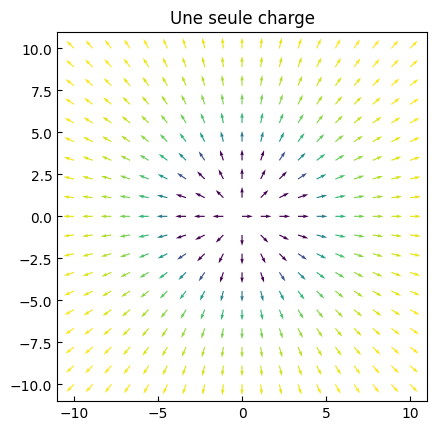

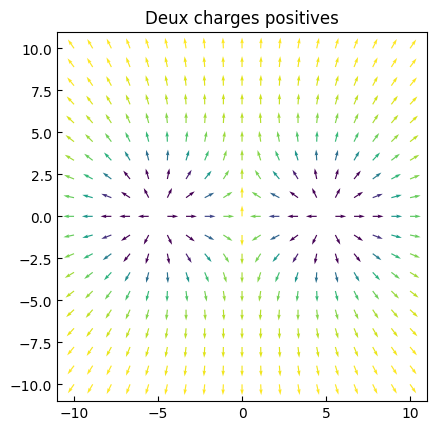

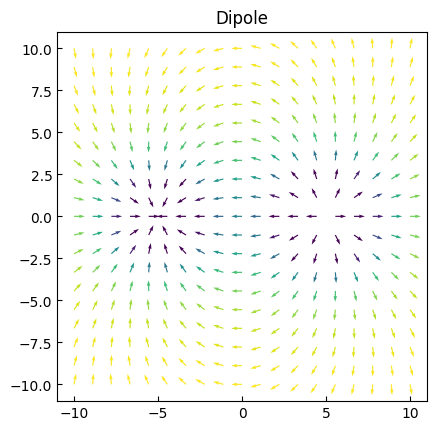

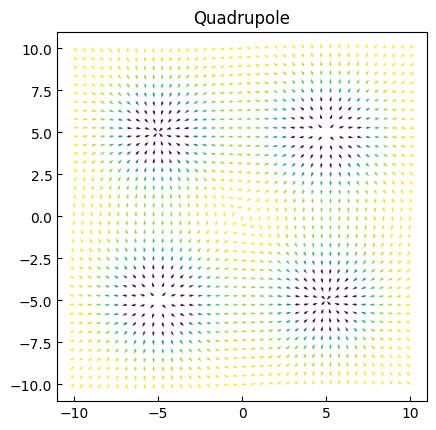

In [11]:
import matplotlib.pyplot as plt
import numpy as np

class SurfaceDomain:
    def __init__(self, size=20, N=19, X=None, Y=None):
        """
        Le domain par défaut va de -10 a 10 en X et Y, et discrétise
        avec N=19 points. L'utilisateur peut quand même fournir ses np.array
        X et Y, déjà calculés d'avance.
        """
        if size is not None:
            X, Y = self.create_square_meshgrid(size, N)
        elif X is None or Y is None:
            X, Y = self.create_square_meshgrid()

        if len(X) != len(Y):
            raise ValueError("Les composantes X et Y doivent avoir le meme nombre d'éléments")

        self._X = X # Lorsqu'on utilise _ devant une variable, c'est une convention de ne pas l'appeler directement
        self._Y = Y # et d'utiliser les @property accessors ou les fonctions

    def xy_mesh(self, xo=0, yo=0):
        """
        Les np.arrays X,Y du meshgrid, mais relatif à l'origine (xo, yo).
        Ceci permet d'utiliser directement les valeurs pour le calcul du
        champ d'une charge unique.

        Par défaut, l'origine est à (0,0)
        """
        return self._X-xo, self._Y-yo

    def rphi_mesh(self, xo=0, yo=0):
        """
        Les np.arrays R,PHI du meshgrid, mais relatif à l'origine (xo, yo).
        Ceci permet d'utiliser directement les valeurs pour le calcul du
        champ d'une charge unique.

        Par défaut, l'origine est à (0,0)
        """
        X,Y = self.xy_mesh(xo, yo)
        return np.sqrt(X*X+Y*Y), np.arctan2(Y, X)

    def create_square_meshgrid(self, size=20, N=19):
        """
        Fonction pour créer un domaine XY rapidement
        """
        x = np.linspace(-size/2,size/2, N)
        y = np.linspace(-size/2,size/2, N)
        return np.meshgrid(x,y)

class VectorField2D:
    def __init__(self, surface=None, U=None, V=None):
        """
        On accepte la surface ou on en crée une par défaut. L'utilisteur peut
        fournir les composantes d'un champ U, V mais sinon, le champ est
        initialisé à 0,0 partout.
        """
        if surface is None:
            surface = SurfaceDomain()

        self.domain = surface

        if U is None or V is None:
            U, V = self.create_null_field_components()

        self.U = U
        self.V = V

        self.quiver_axes = None

        self.validate_arrays() # Avant d'aller plus loin, nous voulons un champ valide


    @property
    def field_magnitude(self):
        return np.sqrt(self.U*self.U+self.V*self.V)

    def create_null_field_components(self):
        X,Y = self.domain.xy_mesh()
        return X*0, X*0 # C'est un truc pour avoir rapidement une liste de la meme longueur avec des zeros

    def create_single_charge_field_components(self, xo=0, yo=0, q=1):

        # On pourra se retrouver, parfois, avec R==0 (a l'origin), et donc 1/(R*R)
        # sera infini. On veut éviter les infinités et les discontinuités.
        # Pour l'instant, pour simplifer, je vais simplement ajouter un tout
        # petit 0.01 a R*R pour eviter que cela donne une division par zero.
        # C'est affreux, mais ca évite les problèmes.
        R, PHI = self.domain.rphi_mesh(xo, yo)

        return q*np.cos(PHI)/(R*R+0.01), q*np.sin(PHI)/(R*R+0.01)

    def add_field_components(self, U, V):
        self.U += U
        self.V += V
        self.validate_arrays()

        self.quiver_axes = None # Nous avons changé le champ, la figure n'est plus valide

    def add_single_charge(self, xo=0, yo=0, q=1):
        U, V = self.create_single_charge_field_components(xo, yo, q)
        self.add_field_components(U, V)

    def validate_arrays(self):
        if self.U is None or self.V is None:
            raise ValueError("Les composantes U et V du champ vectoriel ne sont pas assignées en tout point X et Y")

        if len(self.U) != len(self.V):
            raise ValueError("Les composantes U et V doivent avoir le meme nombre d'éléments")

    def display(self, use_color=True, title=None):
        self.validate_arrays()

        if self.quiver_axes is None:
            self.quiver_axes = plt.subplot(1,1,1)
            self.quiver_axes.tick_params(direction="in")

        self.quiver_axes.cla()

        X,Y = self.domain.xy_mesh()

        if use_color:
            """
            Au lieu de prendre la longueur de la fleche pour représenter
            la force du champ, je garde les fleches de la meme longueur
            et je les colore en fonction de la force du champ.
            """

            lengths = self.field_magnitude

            # Les couleurs sont biaisées car il y a souvent des valeurs tres grandes.
            # PLutot que de normaliser sur la plus grande valeurs, je limite
            # les valeurs entre les percentiles 10-90 et je normalise la longueur des fleches.
            # Ca fait plus beau.
            percentile_10th = np.percentile(lengths, 10)
            percentile_90th = np.percentile(lengths, 90)
            colors = np.clip(lengths, a_min=percentile_10th, a_max=percentile_90th)

            # Et finalement, j'ai compris que les unités du champ sont plus simple
            # lorsqu'on prend relatif a la grandeur du graphique: la largeur
            # de la fleche sera aussi mieux adaptée independamment des unités.
            self.quiver_axes.quiver(X, Y, self.U/lengths, self.V/lengths, colors, cmap="viridis_r")
        else:
            self.quiver_axes.quiver(X, Y, self.U, self.V)

        self.quiver_axes.set_aspect('equal')
        plt.title(title)
        plt.show()
        self.quiver_axes = None

if __name__ == "__main__": # C'est la façon rigoureuse d'ajouter du code après une classe
    single_charge_field = VectorField2D() # Le domaine par défaut est -10 a 10 avec 19 points par dimension
    single_charge_field.add_single_charge(xo=0, yo=0, q=1)
    single_charge_field.display(use_color=True, title="Une seule charge")

    two_charges_field = VectorField2D()
    two_charges_field.add_single_charge(xo=5, yo=0, q=1)
    two_charges_field.add_single_charge(xo=-5, yo=0, q=1)
    two_charges_field.display(use_color=True, title="Deux charges positives")

    dipole_field = VectorField2D()
    dipole_field.add_single_charge(xo=5, yo=0, q=1)
    dipole_field.add_single_charge(xo=-5, yo=0, q=-1)
    dipole_field.display(use_color=True, title="Dipole")

    domain=SurfaceDomain(size=20, N=39)
    quadrupole_field = VectorField2D(domain)
    quadrupole_field.add_single_charge(xo=5, yo=5, q=1)
    quadrupole_field.add_single_charge(xo=-5, yo=5, q=-1)
    quadrupole_field.add_single_charge(xo=5, yo=-5, q=-1)
    quadrupole_field.add_single_charge(xo=-5, yo=-5, q=1)
    quadrupole_field.display(use_color=True, title="Quadrupole")


In [16]:
with open("01-simplest_vector_on_graph.py", "w") as f:
    f.write(In[1])
with open("02-simplest_vector_field.py", "w") as f:
    f.write(In[2])
with open("03-slightly_better_vector_field.py", "w") as f:
    f.write(In[3])
with open("04-decent_vector_field.py", "w") as f:
    f.write(In[4])
with open("05-better_vector_field.py", "w") as f:
    f.write(In[5])
with open("06-field_class.py", "w") as f:
    f.write(In[6])
with open("07-better_field_class.py", "w") as f:
    f.write(In[7])
with open("08-even_better_field_class.py", "w") as f:
    f.write(In[8])
with open("09-much_better_field_class.py", "w") as f:
    f.write(In[9])
with open("10-very_much_better_field_class.py", "w") as f:
    f.write(In[10])
with open("11-wow_field_class.py", "w") as f:
    f.write(In[11])
